In [3]:
#librerias
import numpy as np
from numpy import sin, cos, tan, arctan, pi, exp, tanh, matmul,arange, power
import matplotlib.pyplot as plt
import random as rd
from random import randint, random, uniform

In [4]:
#funcion
def sigmo1(x):
    y=1.0/(1.0+exp(-x))
    return y
def sigmo2(x):
    y=tanh(x)
    return y
#sigmo1(2)

In [5]:
#pesos
w1=np.random.rand(1)
w2=np.random.rand(1)
w3=np.random.rand(1)
w4=np.random.rand(1)
w5=np.random.rand(1)
w6=np.random.rand(1)
w7=np.random.rand(1)
w8=np.random.rand(1)
w9=np.random.rand(1)
w10=np.random.rand(1)
w11=np.random.rand(1)
w12=np.random.rand(1)

#umbrales
b1=np.random.rand(1)
b2=np.random.rand(1)
b3=np.random.rand(1)
b4=np.random.rand(1)
b5=np.random.rand(1)
b6=np.random.rand(1)

#entradas:
X1=np.array([0,0,1,1])#entrada 1 = P
X2=np.array([0,0,1,1])#entrada 2 = Q

#salidas deseadas:
t1=np.array([0,1,1,1])#salida 1 compuerta OR
t2=np.array([0,0,0,1])#salida 2 compuerta AND
t3=np.array([0,1,1,0])#salida 3 compuerta XOR
t4=np.array([1,0,0,1])#salida 4 compuerta XNOR

#factor de aprendizaje
alfa=0.01

print("Pesos iniciales aleatorios")
print("w1=",w1," ","w2=",w2," ","w3=",w3," ","w4=",w4," ","w5=",w5," ","w6=",w6," ")
print("w7=",w7," ","w8=",w8," ","w9=",w9," ","w10=",w10," ","w11=",w11," ","w12=",w12," ")
print("Umbrales iniciales aleatorios")
print("b1=",b1," ","b2=",b2," ","b3=",b3," ","b4=",b4," ","b5=",b5," ","b6=",b6," ")

Pesos iniciales aleatorios
w1= [0.23360761]   w2= [0.32343771]   w3= [0.9754107]   w4= [0.19008004]   w5= [0.42261235]   w6= [0.84972545]  
w7= [0.29079906]   w8= [0.06054339]   w9= [0.05803825]   w10= [0.68665674]   w11= [0.90690374]   w12= [0.21301373]  
Umbrales iniciales aleatorios
b1= [0.57798049]   b2= [0.350568]   b3= [0.08192994]   b4= [0.7575017]   b5= [0.70619383]   b6= [0.84474924]  


In [6]:
#ciclos de aprendizaje
errorT = 1
jj = 0
jj_list = []
errorT_list = []
while errorT != 0:#ciclos de aprendizaje (iteracion)
    #errorT = 0.01
    for k in range(4):
        
        #propagacion hacia adelante
        a11=sigmo1(X1[k]*w1+X2[k]*w3+b1)
        a12=sigmo1(X1[k]*w2+X2[k]*w4+b2)
        a21=sigmo1(a11*w5+a12*w6+b3)
        a22=sigmo1(a11*w7+a12*w8+b4)
        a23=sigmo1(a11*w9+a12*w10+b5)
        a24=sigmo1(a11*w11+a12*w12+b6)
        
        #error capas de salida        
        E21=t1[k]-a21    
        E22=t2[k]-a22
        E23=t3[k]-a23
        E24=t4[k]-a24
        
        #error capas internas    
        #E11=(a11*(1-a11))*(w5*E21)
        #E12=(a11*(1-a11))*(w6*E21)
        
        #E11=(a11*(1-a11))*(w7*E22)
        #E12=(a11*(1-a11))*(w8*E22)
        
        #E11=(a11*(1-a11))*(w9*E23)
        #E12=(a11*(1-a11))*(w10*E23)
                
        #E11=(a11*(1-a11))*(w11*E24)
        #E12=(a11*(1-a11))*(w12*E24)
        E11=(a11*(1-a11))*(w5*E21 + w7*E22 + w9*E23 + w11*E24)
        E12=(a12*(1-a12))*(w6*E21 + w8*E22 + w10*E23 + w12*E24)
        #calcular pesos nuevos
        w1=w1+alfa*X1[k]*E11
        w2=w2+alfa*X1[k]*E12
        w3=w3+alfa*X2[k]*E11
        w4=w4+alfa*X2[k]*E12
        w5=w5+alfa*a11*E21
        w6=w6+alfa*a12*E21
        w7=w7+alfa*a11*E22
        w8=w8+alfa*a12*E22
        w9=w9+alfa*a11*E23
        w10=w10+alfa*a12*E23
        w11=w11+alfa*a11*E24
        w12=w12+alfa*a12*E24
        
        #calcular umbrales nuevos
        b1=b1+alfa*E11
        b2=b2+alfa*E12
        b3=b3+alfa*E21
        b4=b4+alfa*E22
        b5=b5+alfa*E23
        b6=b6+alfa*E24
        
        #calcular hasta que el error sea 0
        #error=(E21)**2
        #error=(E22)**2
        #error=(E23)**2
        #error=(E24)**2
        #errorT=errorT+error
        errorT = errorT+E21**2 + E22**2 + E23**2 + E24**2
    #end for k
    #error medio cuadratico
    errorT=errorT/16 #producido en 1 sola iteracion
    jj=jj+1
    print("jj=",jj," ", errorT)
    print("w1=",w1,"w2=",w2,"w3=",w3,"w4=",w4,"w5=",w5,"w6=",w6,"w7=",w7,"w8=",w8,"w9=",w9,"w10=",w10,"w11=",w11,"w12=",w12,"b1=",b1,"b2=",b2,"b3=",b3,"b4=",b4,"b5=",b5,"b6=",b6,)
    
    jj_list.append(jj)
    errorT_list.append(errorT)
    
    if errorT<=0.201:
        break
    #while True:
    #    diferencia=abs(errorT-errorT)
    #    if diferencia<0.0001:
    #        break
 #end while errorT 

jj= 1   [0.38331851]
w1= [0.23289401] w2= [0.32321798] w3= [0.97469709] w4= [0.18986031] w5= [0.42453946] w6= [0.85106537] w7= [0.27750375] w8= [0.04874972] w9= [0.05004852] w10= [0.67977806] w11= [0.89671435] w12= [0.20425682] b1= [0.57447943] b2= [0.34811968] b3= [0.08317799] b4= [0.73831827] b5= [0.69556226] b6= [0.83120952]
jj= 2   [0.34193532]
w1= [0.23221391] w2= [0.3230449] w3= [0.97401699] w4= [0.18968723] w5= [0.42645001] w6= [0.85239035] w7= [0.26444265] w8= [0.03715635] w9= [0.0421817] w10= [0.67300486] w11= [0.88664573] w12= [0.19560391] b1= [0.57110084] b2= [0.34579509] b3= [0.08440395] b4= [0.71942697] b5= [0.68508453] b6= [0.81781908]
jj= 3   [0.33655187]
w1= [0.23156653] w2= [0.32291684] w3= [0.97336961] w4= [0.18955917] w5= [0.4283441] w6= [0.85370057] w7= [0.25161466] w8= [0.02576213] w9= [0.03443666] w10= [0.66633604] w11= [0.87669792] w12= [0.18705486] b1= [0.56784168] b2= [0.34359033] b3= [0.08560791] b4= [0.70082745] b5= [0.67475974] b6= [0.80457868]
jj= 4   [0.33

Datos:
w5: [3.51097282]
w6: [3.29649798]
b3: [-0.72668278]


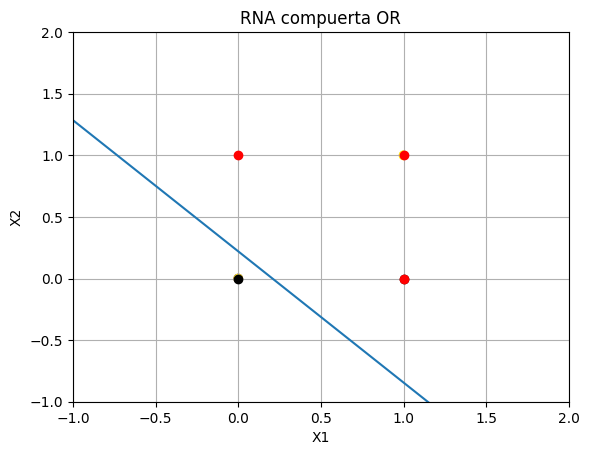

In [7]:
#grafica OR
%matplotlib inline
print("Datos:")
print("w5:",w5)
print("w6:",w6) 
print("b3:",b3)

plt.title('RNA compuerta OR')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot([0,0], "ko",[0,1,1],[1,0,1], "ro")
plt.axis([-1,2,-1,2])
plt.grid()
w5 = w5
w6 = w6

x = arange(-3, 3)
y = -(w5* x + b3) / w6
plt.plot(x, y, label="Recta 1")
plt.scatter(X1, X2, c=t1)
plt.show()

Datos:
w7: [3.25951479]
w8: [2.05979433]
b4: [-4.93569589]


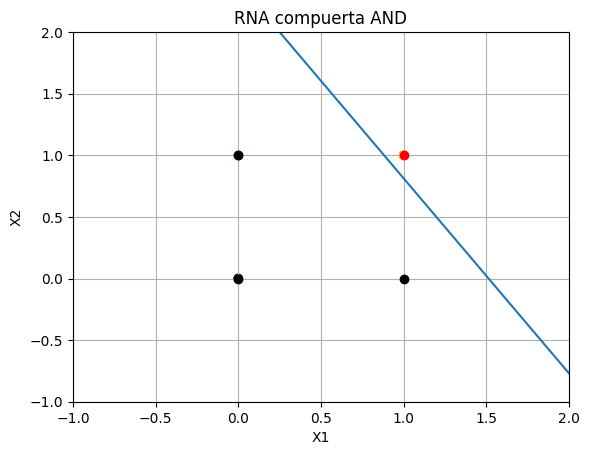

In [8]:
#grafica AND
%matplotlib inline
print("Datos:")
print("w7:",w7)
print("w8:",w8) 
print("b4:",b4)

plt.title('RNA compuerta AND')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot([1,1],"ro" ,[0,1,0],[0,0,1],"ko")
plt.axis([-1,2,-1,2])
plt.grid()
w7 = w7
w8 = w8

x = arange(-3, 3)
y = -(w7 * x + b4) / w8
plt.plot(x, y, label="Recta 1")
plt.scatter(X1, X2, c=t2)
plt.show()

Datos:
w9: [-0.30999918]
w10: [0.32637147]
b5: [-0.01365862]


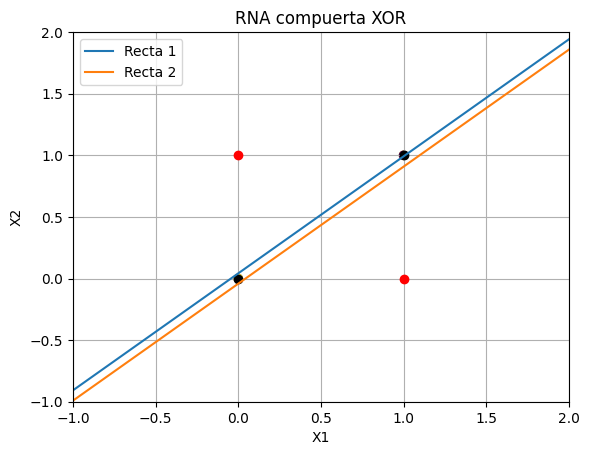

In [9]:
#grafica XOR
%matplotlib inline
print("Datos:")
print("w9:", w9)
print("w10:", w10) 
print("b5:", b5)

plt.title('RNA compuerta XOR')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot([0,1],[0,1], "ko",[0,1],[1,0], "ro")
plt.axis([-1,2,-1,2])
plt.grid()
w9 = w9
w10 = w10

x = np.arange(-3, 3)
y1 = -(w9 * x + b5) / w10  # primera recta pendiente
y2 = -(w9 * x - b5) / w10  # segunda recta pendiente

plt.plot(x, y1, label="Recta 1")  # dibujamos la primera recta
plt.plot(x, y2, label="Recta 2")  # dibujamos la segunda recta
plt.scatter(X1, X2, c=t3)
plt.legend()
plt.show()

Datos:
w11: [0.28798398]
w12: [-0.30233654]
b6: [0.01239133]


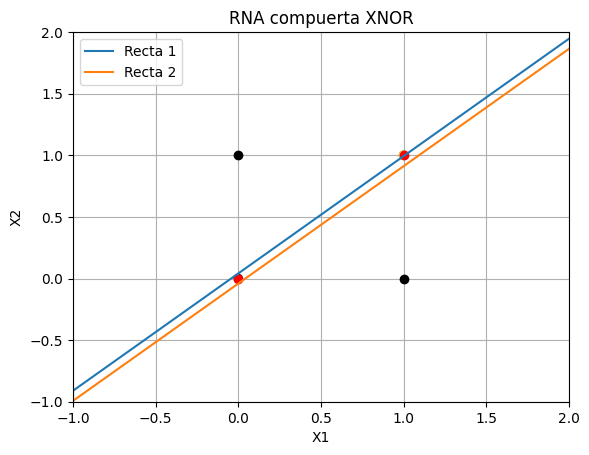

In [10]:
#grafica XNOR
%matplotlib inline
print("Datos:")
print("w11:", w11)
print("w12:", w12) 
print("b6:", b6)

#x_min, x_max = -1, 2
#y_min, y_max = -1, 2
#xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
#Z = np.round(sigmo1(np.dot(sigmo1(np.dot(np.hstack((xx.ravel()[:, np.newaxis], yy.ravel()[:, np.newaxis])), hidden_weights) + hidden_bias), output_weights) + output_bias))
#Z = Z.reshape(xx.shape)
# Graficar el resultado de la predicción junto con los datos de entrada
#plt.contour(xx, yy, Z, levels=[0.5], colors='xkcd:ocean blue')
#plt.scatter(p[:, 0], p[:, 1], c=t.ravel(), cmap=plt.cm.Spectral)

plt.title('RNA compuerta XNOR')
plt.xlabel('X1')
plt.ylabel('X2')
plt.plot([0, 1], [1, 0], "ko", [0, 1], [0, 1], "ro")
plt.axis([-1, 2, -1, 2])
plt.grid()
w11 = w11
w12 = w12

x = np.arange(-3, 3)
y1 = -(w11 * x + b6) / w12  # primera recta pendiente
y2 = -(w11 * x - b6) / w12  # segunda recta pendiente

plt.plot(x, y1, label="Recta 1")  # dibujamos la primera recta
plt.plot(x, y2, label="Recta 2")  # dibujamos la segunda recta
plt.scatter(X1, X2, c=t4)
plt.legend()
plt.show()

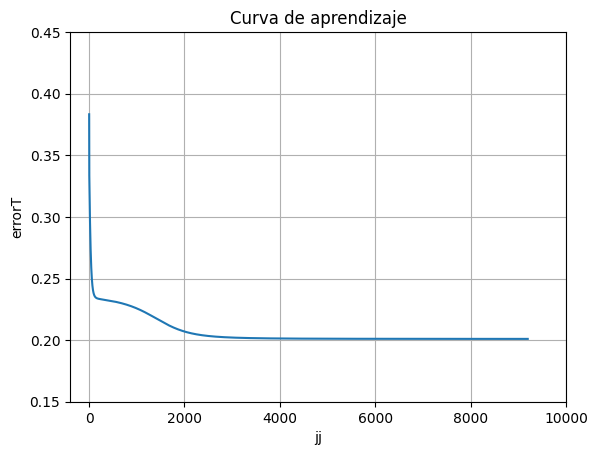

In [13]:
#grafica Curva de aprendizaje
%matplotlib inline

# Graficar los valores de jj vs errorT
plt.title('Curva de aprendizaje')
plt.plot(jj_list, errorT_list)
plt.grid()
x = np.arange(-3, 3)
plt.xlim(-400, 10000)  # Establece los límites del eje x
plt.ylim(0.15, 0.45)  # Establece los límites del eje y
plt.xlabel('jj')
plt.ylabel('errorT')
plt.show()